In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
import os

# Cargar dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
file_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(file_path)

display(df.head())

Using Colab cache for faster access to the 'telco-customer-churn' dataset.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. General Customer Profile

In [16]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df = df.dropna(subset=["TotalCharges"])

desc_stats = df[["tenure", "MonthlyCharges", "TotalCharges"]].describe()
display(desc_stats)

tenure_mean = df["tenure"].mean()
tenure_median = df["tenure"].median()

print(f"Mean tenure: {tenure_mean:.2f}")
print(f"Median tenure: {tenure_median:.2f}")

if tenure_mean > tenure_median:
    print("The mean is greater than the median, suggesting a right-skewed distribution (some customers stay much longer than typical).")
elif tenure_mean < tenure_median:
    print("The mean is less than the median, suggesting a left-skewed distribution.")
else:
    print("The mean and median are similar, suggesting symmetry.")

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Mean tenure: 32.42
Median tenure: 29.00
The mean is greater than the median, suggesting a right-skewed distribution (some customers stay much longer than typical).


Basado en el **mean tenure** de **32.42** meses y el **median tenure** of **29.00** meses, mean es un poco más grande que median. Por lo cuál parece que el customer tenure está un poco sesgado a la derecha, o sea que hay clientes que han estado con la compañía por mucho más tiempo que el usuario típico. El usuario típico como lo representa median, tiene un tenure alrededor de 29 months.

##  2. Distribution Visualization

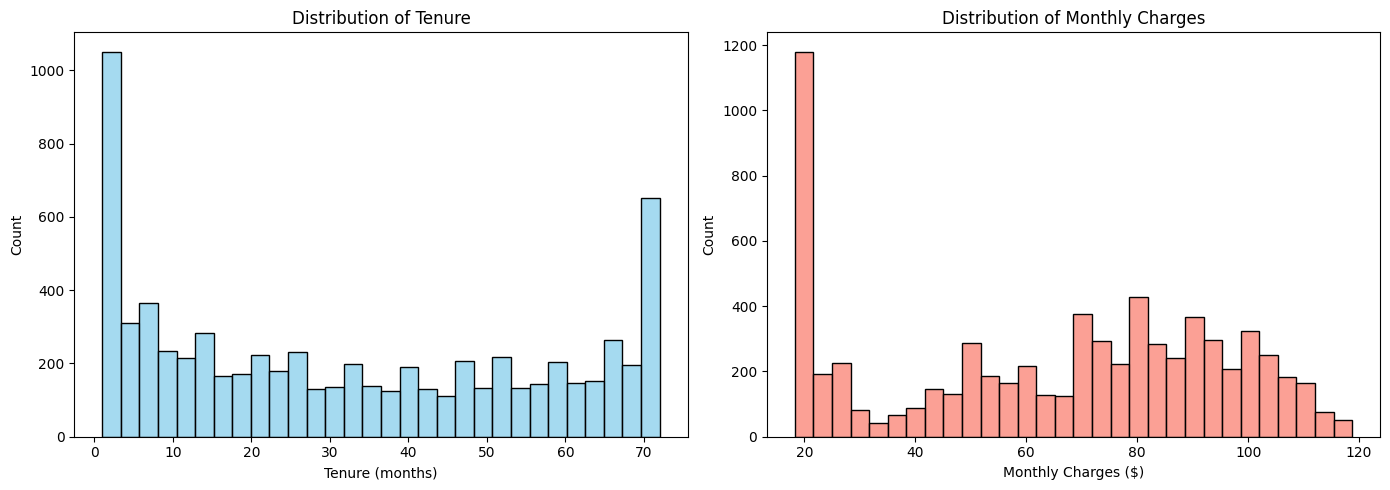

In [17]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df["tenure"], bins=30, kde=False, color="skyblue")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.histplot(df["MonthlyCharges"], bins=30, kde=False, color="salmon")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Distribución de Tenure:** La distribución está sesgada a la derecha. Hay un pico grande de clientes nuevos (pocos meses) y luego la cantidad disminuye, con otro pico al final (clientes de larga duración). Esto sugiere que muchos clientes se van pronto, pero los que se quedan tienden a quedarse por mucho tiempo.


**Distribución MonthlyCharges:** parece tener dos picos principales, lo que sugiere que es bimodal. Un pico significativo se encuentra alrededor de los 20, indicando que hay un grupo considerable de clientes con cargos mensuales bajos. El otro pico menor entre 70 y 100. Esto podría reflejar que muchos clientes tienen planes o paquetes de servicios que caen dentro de este rango de precios más alto.

## 3. Segment Analysis (Churn vs. No Churn)

,tenure,MonthlyCharges
Churn,,
No,38.0,64.45
Yes,10.0,79.65


/tmp/ipython-input-2290727694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")


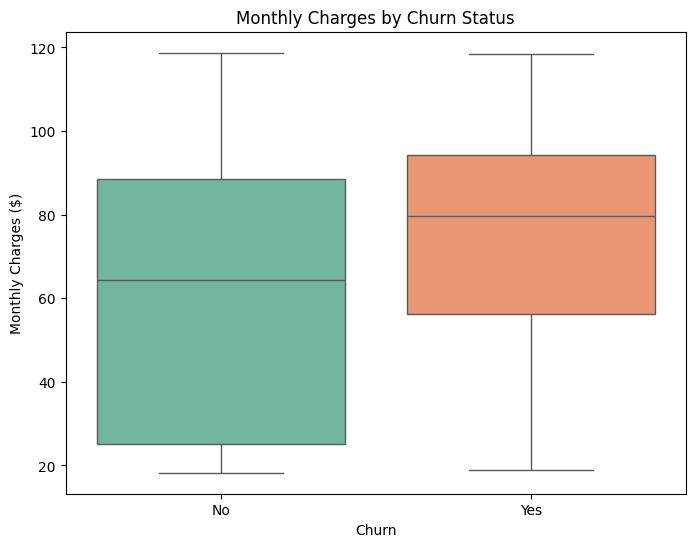

In [18]:
median_by_churn = df.groupby("Churn")[["tenure", "MonthlyCharges"]].median()
display(median_by_churn)

plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.show()


**Tenure:** La mediana tenure para los clientes que no se dieron de baja es de 38 meses, mientras que para los clientes que sí se dieron de baja es de solo 10 meses. Se puede ver que los clientes que se quedan tienden a tener una antigüedad mucho mayor que aquellos que se van. Una menor antigüedad parece estar asociada con la probabilidad de churn.

**MonthlyCharges:** La mediana MonthlyCharges para los clientes que no se dieron de baja es de 64.45, mientras que para los clientes que sí se dieron de baja es de 79.65. Esto indica que los clientes que se dan de baja tienden a tener cargos mensuales ligeramente más altos que los clientes que permanecen.


El box plot muestra la distribución de los cargos mensuales para cada grupo de churn.

La caja para los clientes que no se dieron de baja está un poco más abajo en el eje de MonthlyCharges, con una mediana de 64.45. La dispersión de los cargos mensuales para este grupo parece ser un poco menor en comparación con el grupo que sí se dio de baja, la caja es un poco más alargada, lo que puede significar una mayor variabilidad en los cargos mensuales entre los clientes que no se van.

La caja para los clientes que sí se dieron de baja está un poco más arriba, con una mediana de 79.65.